<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Материалы Юстины Ивановой: https://github.com/yustinaivanova/netology_statistics_february_20

# Домашняя работа №3

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
import ssl

Загрузить датасет по url:


In [4]:
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
data=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [8]:
data.head(1000)

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...
151,Rwanda,152,63,54.0,102.0,144.0,21.0,2.0,90.0,132.0,103.0
152,Tanzania,153,122,78.0,50.0,131.0,78.0,34.0,49.0,125.0,118.0
153,Afghanistan,154,25,152.0,133.0,151.0,155.0,136.0,137.0,134.0,139.0
154,Central African Republic,155,117,132.0,153.0,155.0,133.0,122.0,113.0,152.0,150.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

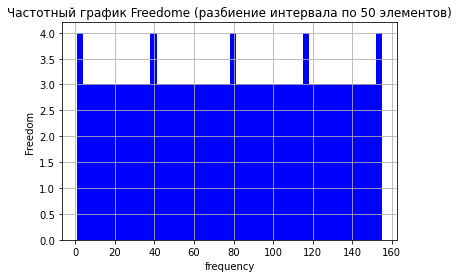

In [16]:
n, bins, patches = plt.hist(data['Freedom'], 50, facecolor='b')

# частотный график выборки

plt.xlabel('frequency')
plt.ylabel('Freedom')
plt.title('Частотный график Freedome (разбиение интервала по 50 элементов)')
plt.grid(True)
plt.show()

In [42]:
# распределение - многовершинное, явно не нормальное

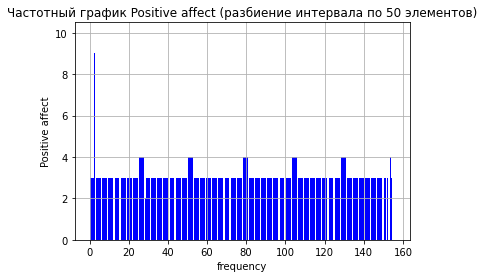

In [15]:
n, bins, patches = plt.hist(data.groupby(['Positive affect','Freedom']).sum(), 50, facecolor='b')

plt.xlabel('frequency')
plt.ylabel('Positive affect')
plt.title('Частотный график Positive affect (разбиение интервала по 50 элементов)')
plt.grid(True)
plt.show()

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [22]:
data.loc[pd.isnull(data.Freedom), 'Freedom']=0
data.loc[pd.isnull(data['Positive affect']), 'Positive affect']=0

print('Медиана: ', statistics.median(data['Freedom']))
print('Значение моды: ', statistics.mode(data['Freedom']))
duration = data['Freedom']
print('Математическое ожидание: ', statistics.mean(duration))
print('Стандартное отклонение: ', max(data['Freedom']))
print('Дисперсия: ', max(data['Freedom']))
print('Минимум: ', min(data['Freedom']))
print('Максимум: ', max(data['Freedom']))
print('Размах Freedom: ', max(data['Freedom']) - min(data['Freedom']))

Медиана:  77.5
Значение моды:  5.0
Математическое ожидание:  77.5
Стандартное отклонение:  155.0
Дисперсия:  155.0
Минимум:  0.0
Максимум:  155.0
Размах Freedom:  155.0


Почему нельзя найти моду?

In [0]:
# Получилось найти моду

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

Коэффициент Пирсона: 0.6878506740844936


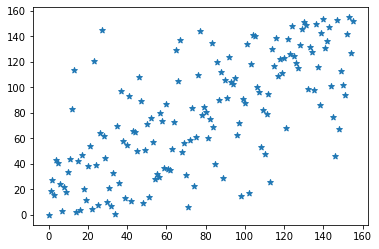

In [24]:
from scipy.stats import pearsonr
x = data['Freedom']
y = data['Positive affect']
correlation, p_val = pearsonr(x, y)
plt.scatter(x, y, marker='w')
print('Коэффициент Пирсона:', correlation)

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [26]:
Freedom = data['Freedom']
print(statistics.mean(Freedom))
Freedom2 = Freedom - statistics.mean(Freedom)
print(statistics.mean(Freedom2))

77.5
0.0


In [28]:
# Разброс данных приводим к виду (-1,1)

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

Freedom3 = min_max_scaler.fit_transform(np.array(Freedom2).reshape(-1, 1))
print(min(Freedom3))
print(max(Freedom3))

[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

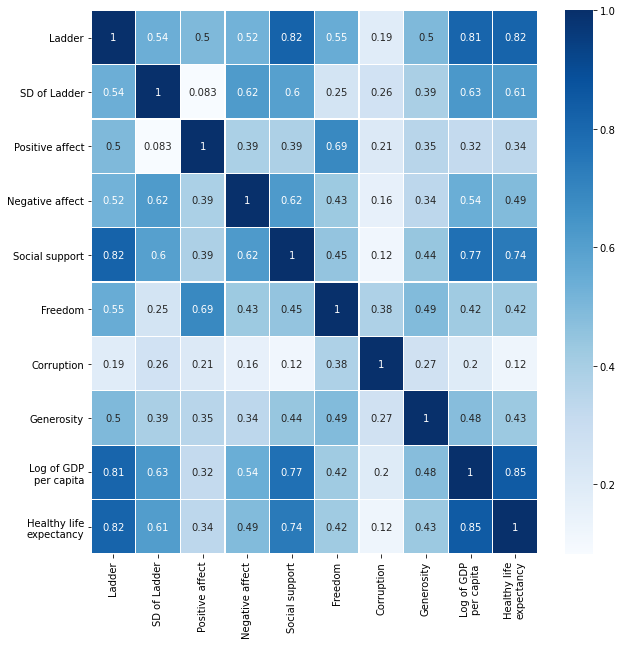

In [33]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True,cmap=plt.cm.Blues,linewidths=0.3) 
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

Загрузить таблицу цен на авокадо: 

In [34]:
data=pd.read_csv('avocado.csv')
data[:5]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

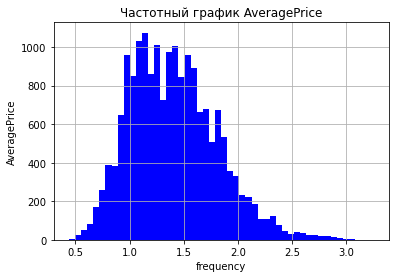

In [35]:
n, bins, patches = plt.hist(data['AveragePrice'], 50, facecolor='b')
plt.xlabel('frequency')
plt.ylabel('AveragePrice')
plt.title('Частотный график AveragePrice')
plt.grid(True)
plt.show()

In [36]:
# Распределение - многовершинное

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

Коэффициент корреляции Пирсона: -0.2083170484878848


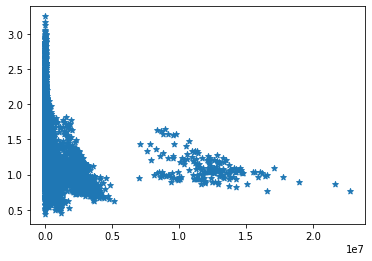

In [37]:
from scipy.stats import pearsonr
x = data['4046']
y = data['AveragePrice']
correlation, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='*')
print('Коэффициент корреляции Пирсона:', correlation)

Коэффициент корреляции Пирсона: -0.1729277725093354


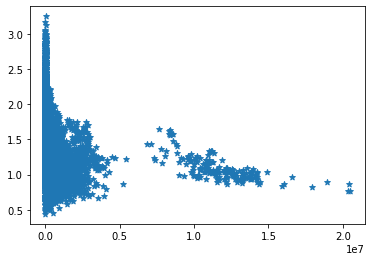

In [40]:
x = data['4225']
y = data['AveragePrice']
correlation, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='*')
print('Коэффициент корреляции Пирсона:', correlation)

Коэффициент корреляции Пирсона: -0.17944598397975622


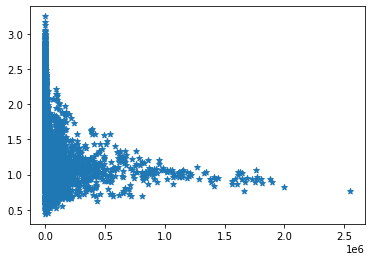

In [39]:
x = data['4770']
y = data['AveragePrice']
correlation, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='*')
print('Коэффициент корреляции Пирсона:', correlation)

In [43]:
# Вывод: корреляции обратные и при изменении значений ( данных) стоимость авокадо падает.